#                                     Notebook Bottleneck

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Question 1: Nettoyage des données et rapprochement des dossiers

### chargement du dossier web en version excel

In [2]:
web = pd.read_excel('web.xlsx')
web.head()

C:\Users\tangu\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### renommage de la colonne sku par id_web

In [3]:
web.rename(columns={"sku":"id_web"},inplace=True)
web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### suppression de certaines colonnes non pertinantes pour le projet

In [4]:
web = web.drop(['virtual','downloadable','rating_count','average_rating','tax_status','tax_class','post_date'
                ,'post_modified','post_modified_gmt','post_content_filtered','post_parent'
                ,'guid','menu_order','post_content','post_date_gmt','comment_status','ping_status'
                ,'post_password','post_mime_type','comment_count','post_author','post_status','post_excerpt'], axis=1)
web.head()

,id_web,total_sales,post_title,post_name,post_type
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€,bon-cadeau-de-25-euros,product
1,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,product
2,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,product
3,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,product
4,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,product


In [5]:
web.describe(include='all')

,id_web,total_sales,post_title,post_name,post_type
count,1428,1430.000000,1430,1430,1430
unique,714,NaN,713,716,2
top,bon-cadeau-25-euros,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,bon-cadeau-de-25-euros,product
freq,2,NaN,4,2,716
mean,NaN,4.006993,NaN,NaN,NaN
std,NaN,8.510559,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN
75%,NaN,4.000000,NaN,NaN,NaN


In [6]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_web       1428 non-null   object 
 1   total_sales  1430 non-null   float64
 2   post_title   1430 non-null   object 
 3   post_name    1430 non-null   object 
 4   post_type    1430 non-null   object 
dtypes: float64(1), object(4)
memory usage: 59.2+ KB


### calcul de la somme des valeurs nulles dans le dossier web

In [7]:
print(web.isnull().sum())

id_web         85
total_sales    83
post_title     83
post_name      83
post_type      83
dtype: int64


### recherche des doublons dans le dossier web

In [8]:
duplicate_web = web[web.duplicated('id_web')]
duplicate_web

,id_web,total_sales,post_title,post_name,post_type
179,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN,NaN
233,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1508,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,mouthes-le-bihan-aime-chai-2015,attachment
1509,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018,camin-larredya-jurancon-sec-la-virada-2018,attachment
1510,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,attachment
1511,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,attachment


### suppression des doublons en ne conservant que le premier doublons de chaque

In [9]:
web.drop_duplicates(subset = 'id_web',keep = 'first', inplace=True)

In [10]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 798
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_web       714 non-null    object 
 1   total_sales  714 non-null    float64
 2   post_title   714 non-null    object 
 3   post_name    714 non-null    object 
 4   post_type    714 non-null    object 
dtypes: float64(1), object(4)
memory usage: 33.5+ KB


### vérification du nombre de valeur unique dans 'id_web'

In [11]:
web_unique = len(pd.unique(web['id_web']))
web_unique

715

# chargement du dossier liaison

In [12]:
liaison = pd.read_excel('liaison.xlsx')
liaison

C:\Users\tangu\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [13]:
liaison.describe(include='all')

,product_id,id_web
count,825.000000,734.0
unique,NaN,734.0
top,NaN,15298.0
freq,NaN,1.0
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


In [14]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


### suppression des valeurs NaN dans la colonne 'id_web'

In [15]:
liaison = liaison.dropna(subset=['id_web'])
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


### comptage des id_web unique dans le dossier liaison

In [16]:
liaison_unique = len(pd.unique(liaison['id_web']))
liaison_unique

734

### véification des valeurs nulles dans le dossier liaison

In [17]:
print(liaison.isnull().sum())

product_id    0
id_web        0
dtype: int64


### recherche des doublons dans le dossier liaison

In [18]:
duplicate_web = liaison[liaison.duplicated()]
duplicate_web

,product_id,id_web


In [19]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  734 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


# jointure externe des tableaux web et liaision par la colonne 'id_web'

In [20]:
df1 = pd.merge(web,liaison, on='id_web', how='outer')
df1

,id_web,total_sales,post_title,post_name,post_type,product_id
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€,bon-cadeau-de-25-euros,product,4954.0
1,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,product,3847.0
2,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,product,3849.0
3,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,product,3850.0
4,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,product,4032.0
...,...,...,...,...,...,...
730,15609,NaN,NaN,NaN,NaN,5954.0
731,14377,NaN,NaN,NaN,NaN,5955.0
732,13577,NaN,NaN,NaN,NaN,5957.0
733,15529,NaN,NaN,NaN,NaN,6100.0


### suppression des valeurs NaN dans la colonne 'total_sales'

In [21]:
df1 = df1.dropna(subset=['total_sales'])
df1

,id_web,total_sales,post_title,post_name,post_type,product_id
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€,bon-cadeau-de-25-euros,product,4954.0
1,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,product,3847.0
2,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,product,3849.0
3,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,product,3850.0
4,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,product,4032.0
...,...,...,...,...,...,...
710,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,mouthes-le-bihan-aime-chai-2015,product,6930.0
711,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018,camin-larredya-jurancon-sec-la-virada-2018,product,7023.0
712,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,product,7025.0
713,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product,7247.0


# chargement du dossier erp

In [22]:
erp = pd.read_excel('erp.xlsx')
erp

C:\Users\tangu\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


### vérification du nombre de valeurs unique dans la colonne 'product_id'

In [23]:
print(len(erp['product_id'].unique()))

825


In [24]:
erp.describe(include='all')

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


In [25]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


### recherche si valeurs nulles dans le dossier erp

In [26]:
print(erp.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [27]:
print(erp.isna().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


### recherche des doublons dans le dossier erp

In [28]:
duplicate_erp = erp[erp.duplicated()]
duplicate_erp

,product_id,onsale_web,price,stock_quantity,stock_status


# jointure à gauche entre les tableaux df1 et erp par la colonne 'product_id'

In [29]:
df_total = pd.merge(df1,erp,on='product_id', how='left', indicator=True)
df_total

,id_web,total_sales,post_title,post_name,post_type,product_id,onsale_web,price,stock_quantity,stock_status,_merge
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€,bon-cadeau-de-25-euros,product,4954.0,1,25.0,0,instock,both
1,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,product,3847.0,1,24.2,0,outofstock,both
2,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,product,3849.0,1,34.3,0,outofstock,both
3,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,product,3850.0,1,20.8,0,outofstock,both
4,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,product,4032.0,1,14.1,0,outofstock,both
...,...,...,...,...,...,...,...,...,...,...,...
709,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,mouthes-le-bihan-aime-chai-2015,product,6930.0,1,8.4,83,instock,both
710,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018,camin-larredya-jurancon-sec-la-virada-2018,product,7023.0,1,27.5,15,instock,both
711,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,product,7025.0,1,69.0,2,instock,both
712,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,product,7247.0,1,54.8,23,instock,both


### vérification si toutes les ventes sont des ventes web

In [30]:
web = (df_total['onsale_web']==1).sum()
web

714

# Question 2: calcul du chiffre d'affaires par produit et total

### création de la colonne chiffre d'affaires par produit

In [31]:
df_total['CA par produit']= df_total['total_sales']*df_total['price']
df_total[['id_web','total_sales','post_title','product_id','price','CA par produit']].head()

,id_web,total_sales,post_title,product_id,price,CA par produit
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€,4954.0,25.0,250.0
1,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,3847.0,24.2,145.2
2,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,3849.0,34.3,0.0
3,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,3850.0,20.8,0.0
4,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,4032.0,14.1,42.3


### calcul du chiffre d'affaires total

In [32]:
CA_total = df_total['CA par produit'].sum()
print('Le chiffre d_affaires total est de',CA_total,'euros')

Le chiffre d_affaires total est de 70568.6 euros


In [33]:
df_total.describe()

,total_sales,product_id,onsale_web,price,stock_quantity,CA par produit
count,714.000000,714.000000,714.0,714.000000,714.000000,714.000000
mean,4.012605,5032.557423,1.0,32.493137,28.746499,98.835574
std,8.518183,790.510878,0.0,27.810525,48.012608,307.685071
min,0.000000,3847.000000,1.0,5.200000,0.000000,0.000000
25%,0.000000,4280.250000,1.0,14.100000,2.000000,0.000000
50%,1.000000,4796.000000,1.0,23.550000,12.000000,15.250000
75%,4.000000,5710.500000,1.0,42.175000,35.000000,91.150000
max,96.000000,7338.000000,1.0,225.000000,578.000000,4704.000000


### calcul de l'écart interquartile et de la limite haute

In [34]:

Q3= round(np.quantile(df_total['price'], 0.75),1)
Q2 =round(np.quantile(df_total['price'], 0.50),1)
Q1 = round(np.quantile(df_total['price'], 0.25),1)
IQR = round(Q3 - Q1,1)
print('l_écart interquartile est de',IQR)
limite_haute = round(Q3 + 1.5 * IQR,1)
print('la limite haute est',limite_haute,'euros')

l_écart interquartile est de 28.1
la limite haute est 84.4 euros


### création d'une colonne zscore en fonction de la colonne 'price'

In [35]:
df_total['zscore'] = stats.zscore(df_total['price'])
df_total.head()

,id_web,total_sales,post_title,post_name,post_type,product_id,onsale_web,price,stock_quantity,stock_status,_merge,CA par produit,zscore
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€,bon-cadeau-de-25-euros,product,4954.0,1,25.0,0,instock,both,250.0,-0.269624
1,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,product,3847.0,1,24.2,0,outofstock,both,145.2,-0.298410
2,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,product,3849.0,1,34.3,0,outofstock,both,0.0,0.065016
3,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,product,3850.0,1,20.8,0,outofstock,both,0.0,-0.420752
4,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,product,4032.0,1,14.1,0,outofstock,both,42.3,-0.661837


### calcul de la valeur absolue du coefficiant de variation 

In [36]:
cv = round(df_total['price'].std()/df_total['price'].mean()*100,2)
print(cv,'%')

85.59 %


### calcul de la limite haute en fonction du coefficiant de variation 

In [61]:
limite_haute_cv_zscore = round(df_total['price'].mean()*1.8559+df_total['price'].mean(),2)
print('la limite haute avec le calcul du zscore est ici de',limite_haute_cv_zscore,'euros')

la limite haute avec le calcul du zscore est ici de 92.8 euros


### calcul de l'écart type via le coefficant de variation

In [38]:
round(df_total['price'].mean()*1.8559/df_total['price'].std(),2)

2.17

# représentations graphiques

## nuage de points ou scatter plot

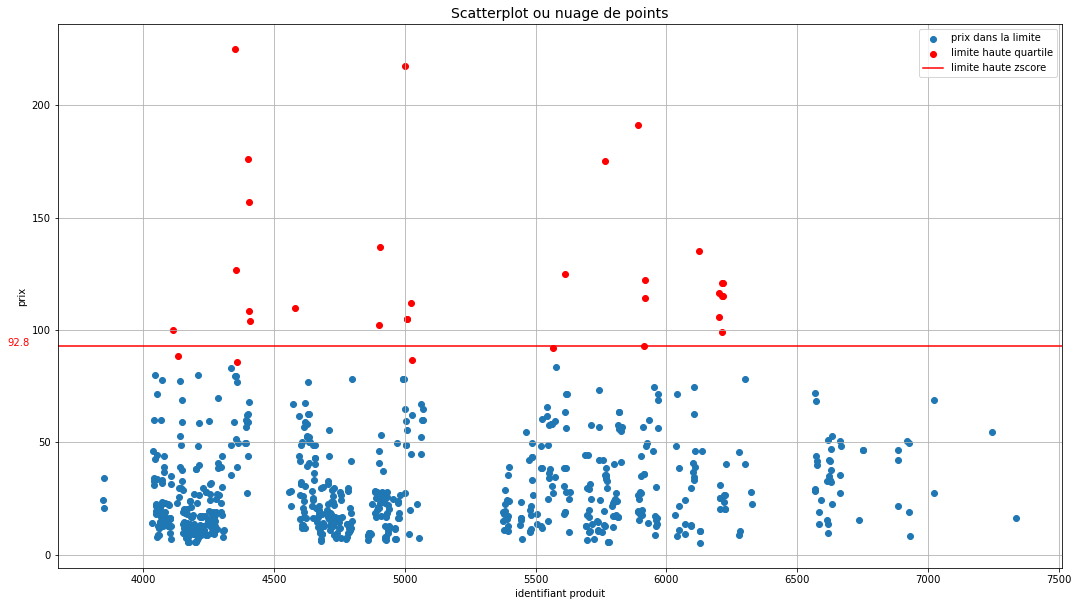

In [59]:

outlier = df_total[(df_total['price'] > limite_haute)]
other= df_total[(df_total['price'] < limite_haute)]
plt.subplots(figsize = (18,10))
plt.scatter(other['product_id'], other['price'])
plt.scatter(outlier['product_id'], outlier['price'],c='red')
plt.axhline(y=limite_haute_cv_zscore,color='red')
plt.title('Scatterplot ou nuage de points',fontsize=14)
plt.xlabel('identifiant produit')
plt.ylabel('prix')
plt.legend(('prix dans la limite','limite haute quartile','limite haute zscore'))
plt.grid()
plt.text(3480,limite_haute_cv_zscore,limite_haute_cv_zscore,color='red')
plt.show()

## boite à moustache ou boxplot

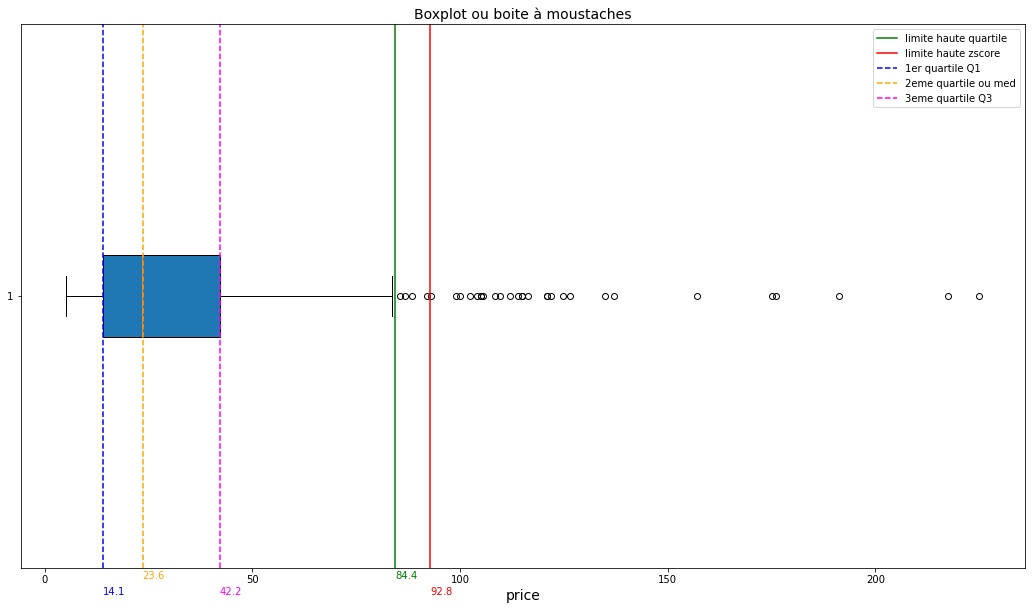

In [40]:
plt.figure(figsize=(18,10))
plt.boxplot(df_total['price'],vert=0,patch_artist=True)
plt.title('Boxplot ou boite à moustaches', fontsize=14)
plt.axvline(x=limite_haute,color='green',label='limite haute quartile')
plt.axvline(x=limite_haute_cv_zscore, color='red',label='limite haute zscore')
plt.axvline(x=Q1,color='blue',linestyle='--',label='1er quartile Q1')
plt.axvline(x=Q2,color='orange',linestyle='--',label='2eme quartile ou med')
plt.axvline(x=Q3, color='magenta',linestyle='--',label='3eme quartile Q3')
plt.text(Q1,0.45,Q1,color='blue')
plt.text(Q2,0.48,Q2,color='orange')
plt.text(Q3,0.45,Q3,color='magenta')
plt.text(limite_haute,0.48,limite_haute,color='green')
plt.text(limite_haute_cv_zscore,0.45,limite_haute_cv_zscore,color='red')
plt.legend()
plt.xlabel('price', fontsize= 14)

plt.show()

### nombre d'outliers et leur index avec la méthode interquartile

In [41]:
print(np.where(df_total['price']>limite_haute))
len(df_total[df_total['price']>limite_haute])

(array([ 64,  66, 200, 202, 206, 219, 220, 222, 223, 228, 381, 382, 426,
       431, 432, 437, 438, 502, 511, 553, 587, 602, 603, 604, 642, 647,
       648, 653, 654, 655, 656, 657], dtype=int64),)


32

### nombre d'outliers et leur index avec le Zscore

In [42]:

print(np.where(df_total['zscore'] > 2.17))
zscore = df_total.loc[df_total['zscore']>2.17]
len(zscore)

(array([ 64, 200, 202, 219, 220, 222, 223, 228, 381, 382, 426, 431, 432,
       437, 511, 553, 587, 602, 603, 604, 642, 647, 648, 653, 654, 655,
       656, 657], dtype=int64),)


28

### calcul du chiffre d'affaires que représente les possibles outliers avec méthode interquartile

In [43]:
outlier_quartile = df_total.loc[df_total['price']>limite_haute].sum()
print('le chiffre d_affaires que représente les outliers est de',outlier_quartile['CA par produit'],'euros')
propo_outlier = round(outlier_quartile['CA par produit']*100/CA_total,2)
print('les outliers représentent',propo_outlier,'%', 'du chiffre d_affaires total')

le chiffre d_affaires que représente les outliers est de 6970.0 euros
les outliers représentent 9.88 % du chiffre d_affaires total


C:\Users\tangu\AppData\Local\Temp\ipykernel_2668\1584877922.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outlier_quartile = df_total.loc[df_total['price']>limite_haute].sum()


### calcul du chiffre d'affaires que représentent les possibles outliers avec la méthode du zscore

In [44]:
outlier_zscore = df_total.loc[df_total['price']>limite_haute_cv_zscore].sum()
print('le chiffre d_affaires que représente les outliers est de',outlier_zscore['CA par produit'],'euros')
propo_outlier_zscore = round(outlier_zscore['CA par produit']*100/CA_total,2)
print('les outliers représentent',propo_outlier_zscore,'%', 'du chiffre d_affaires total')

le chiffre d_affaires que représente les outliers est de 6884.4 euros
les outliers représentent 9.76 % du chiffre d_affaires total


C:\Users\tangu\AppData\Local\Temp\ipykernel_2668\527611460.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outlier_zscore = df_total.loc[df_total['price']>limite_haute_cv_zscore].sum()
